In [1]:
import pandas as pd

In [2]:
df3_WS1T = pd.read_csv("engineering_AF_segment3_workflowS1_has_duration.csv",engine='python')

In [3]:
df3_WS1T.head(n=1)

,CASE_ID,WRKFLW_TSK_MAP_GROUPED,WRKFLW_TSK_MAP_DETAILED,PATH_CRDATETIME,ITEM_CRUSER,WRKFLW_ORG_TYPE_CRUSER,STATUS_ORDER,LATEST_STATUS,WRKFLW_PROCESS,QUERY_PART,...,SPK_CAT_TYPE_CD,BROAD_COURSE_LEVEL,DEGREETYPE,LIABILITY_CATEGORY_CD_RECODE,ORIG_LIABILITY_CATEGORY_CD_RECODE,OFFER_RELEASED_FG,OFFER_OUTCOME_CD,OFFER_CONDITIONS,time_used_str,time_used_second
0,1076817|437987|677024,Submit,Submit,3/1/2019 9:01:49,1076817,NaN,17,N,1. App to Assessment,Part 1 - Application ID Workflow,...,MCW,HDCW,Full Degree,AF,AF,Y,$ACC,N,0 days 3 hours 21 minutes 44 seconds,12104.0


In [4]:
#store unique WRKFLW_TSK_MAP_DETAILED
WRKFLW_TSK_MAP_DETAILED_list = df3_WS1T['WRKFLW_TSK_MAP_DETAILED'].tolist()
unique_WRKFLW_TSK_MAP_DETAILED_list = set(WRKFLW_TSK_MAP_DETAILED_list)
len(unique_WRKFLW_TSK_MAP_DETAILED_list)
unique_WRKFLW_TSK_MAP_DETAILED_list

{'AR - Created - Academic results for prior tertiary studies',
 'AR - Created - Academic transcript Grading Scheme',
 'AR - Created - Academic transcripts for prior tertiary studies',
 'AR - Created - Academic transcripts statement of completion',
 'AR - Created - Advanced standing application',
 'AR - Created - Assessment information (Coursework) (1)',
 'AR - Created - Assessment information (Coursework) (2)',
 'AR - Created - Credit for previous study',
 'AR - Created - Credit for previous study - non-University of Melbourne students',
 'AR - Created - Curriculum Vitae',
 'AR - Created - English language requirements',
 'AR - Created - Further information (1)',
 'AR - Created - Further information (2)',
 'AR - Created - Further information - Document corrupted and cannot be opened',
 'AR - Created - Further information - Genuine Student Checklist',
 'AR - Created - Further information - Official Transcripts',
 'AR - Created - Further information - Syllabus required for Engineering Ad

In [5]:
#store unique CASE_ID
ID_list = df3_WS1T['CASE_ID'].tolist()
unique_ID_list = set(ID_list)
len(unique_ID_list)

752

In [6]:
#create dataframe columns->unique_WRKFLW_TSK_MAP_DETAILED row->unique_ID
df = pd.DataFrame(columns = unique_WRKFLW_TSK_MAP_DETAILED_list, index = unique_ID_list )
df

,AR - Satisfied - Assessment information (Coursework) (2),AR - Requested - Personal statement (500 words),AR - Created - Payment of international application fee,Create Offer,AR - Requested - Further information (1),AR - Requested - Appointment of authorised representative,OC - Created - MYEQUALS transcript authentication for students,AR - Requested - Employer reference letter,AR - Satisfied - Current enrolment at the University of Melbourne,Assessment Decision - No Decision,...,AR - Requested - Academic results for prior tertiary studies,AR - Created - Advanced standing application,AR - Not Satisfied - Academic results for prior tertiary studies,AR - Satisfied - Guaranteed Entry pathways,AR - Satisfied - Specialisation (Master of Engineering),AR - Requested - Further information (2),Put Triage On-Hold,AR - Satisfied - Specialisation (Master of Information Systems),Acacdemic - Assessment Decision - Not Qualified,AR - Created - Further information - Transcripts for subject credited from previous study
1033710|376995|587501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
915326|531313|813213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1132345|507110|778105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
388114|371150|578862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1041587|386786|602292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068696|426431|660784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
694040|525931|805925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1063956|419530|650202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1179697|573960|874171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#sotre id as key and workflow detail of the id as value into dictionary
from collections import defaultdict
ID_WRKFLW_dict = defaultdict(list)
for i, j in zip(df3_WS1T.CASE_ID,df3_WS1T.WRKFLW_TSK_MAP_DETAILED):
    ID_WRKFLW_dict[i].append(j)
len(ID_WRKFLW_dict)

752

In [8]:
#change the value
for key in ID_WRKFLW_dict.keys():
    for process in ID_WRKFLW_dict[key]:
            df.loc[key, process] = 1
zero_one_table = df.fillna(0)
zero_one_table

,AR - Satisfied - Assessment information (Coursework) (2),AR - Requested - Personal statement (500 words),AR - Created - Payment of international application fee,Create Offer,AR - Requested - Further information (1),AR - Requested - Appointment of authorised representative,OC - Created - MYEQUALS transcript authentication for students,AR - Requested - Employer reference letter,AR - Satisfied - Current enrolment at the University of Melbourne,Assessment Decision - No Decision,...,AR - Requested - Academic results for prior tertiary studies,AR - Created - Advanced standing application,AR - Not Satisfied - Academic results for prior tertiary studies,AR - Satisfied - Guaranteed Entry pathways,AR - Satisfied - Specialisation (Master of Engineering),AR - Requested - Further information (2),Put Triage On-Hold,AR - Satisfied - Specialisation (Master of Information Systems),Acacdemic - Assessment Decision - Not Qualified,AR - Created - Further information - Transcripts for subject credited from previous study
1033710|376995|587501,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
915326|531313|813213,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1132345|507110|778105,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
388114|371150|578862,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1041587|386786|602292,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068696|426431|660784,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
694040|525931|805925,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1063956|419530|650202,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1179697|573960|874171,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

features= list(unique_WRKFLW_TSK_MAP_DETAILED_list)
print(len(features))
features.remove('Send for Assessment')
print(len(features))

X=zero_one_table[features]
y=zero_one_table ['Send for Assessment'] # Labels
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) # 70% training and 30% test

112
111


In [11]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 8,
                             random_state = 0)
clf.fit(X_train, y_train)
clf_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, clf_pred))

Accuracy: 0.9574468085106383


In [28]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

In [14]:
print(confusion_matrix(y_test, clf_pred))
print(classification_report(y_test, clf_pred))

[[ 25   1]
 [  7 155]]
              precision    recall  f1-score   support

           0       0.78      0.96      0.86        26
           1       0.99      0.96      0.97       162

    accuracy                           0.96       188
   macro avg       0.89      0.96      0.92       188
weighted avg       0.96      0.96      0.96       188



In [15]:
# DOT data
from IPython.display import Image
from sklearn import tree
import pydotplus
fn=features
cn=['0', '1']
# Create DOT data
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=fn,
                                class_names=cn,filled = True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

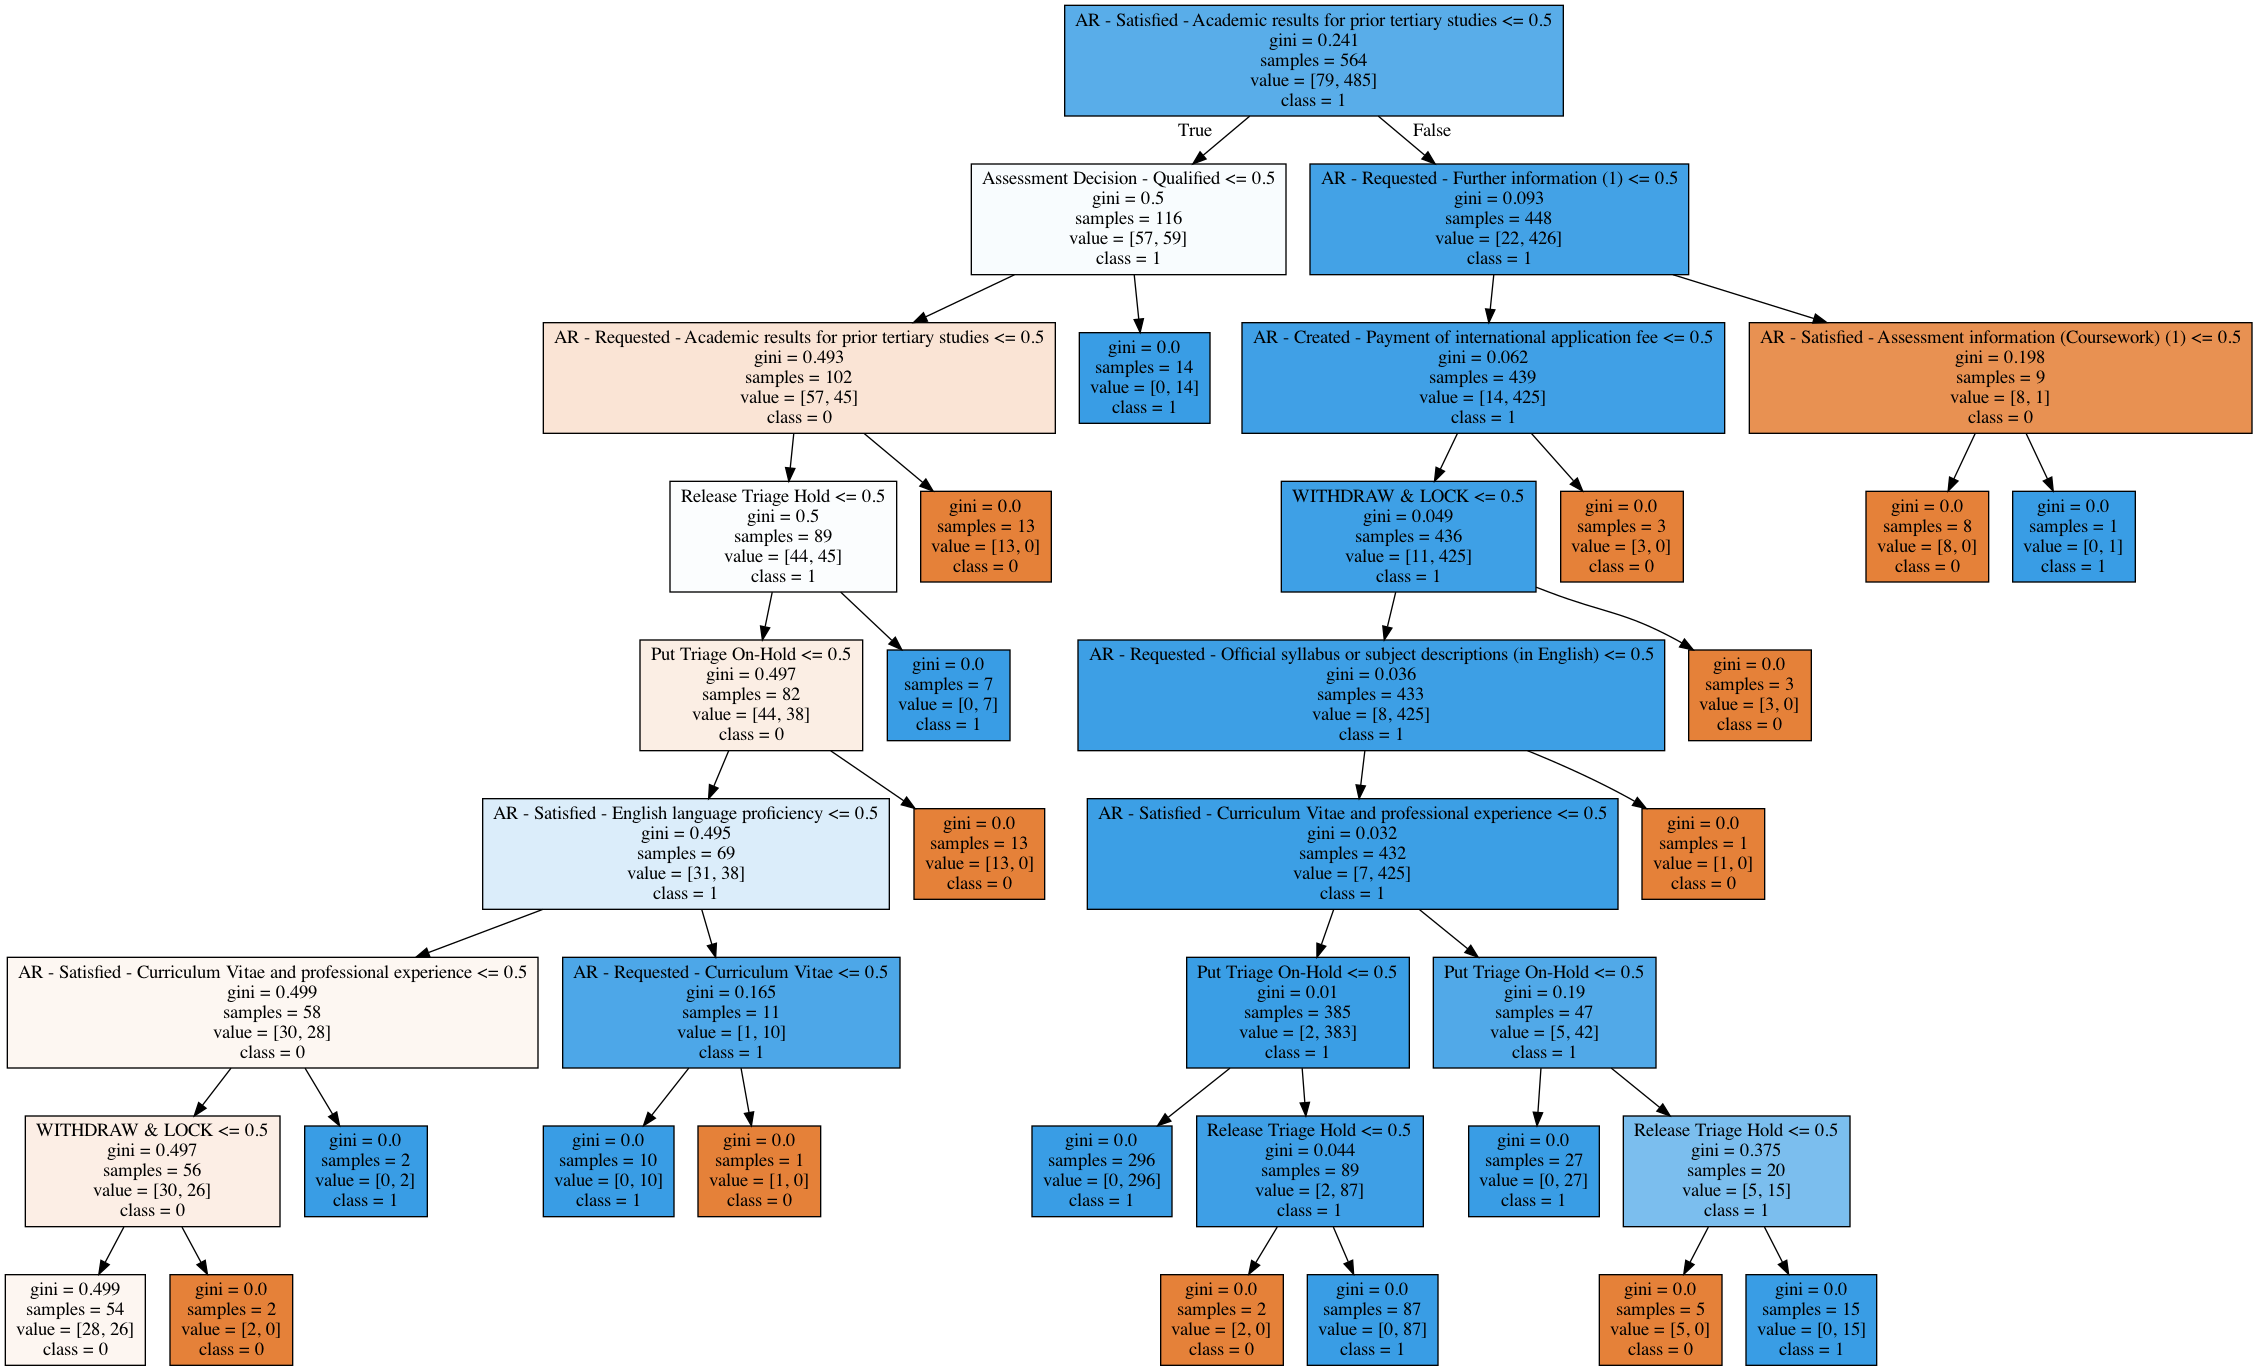

In [16]:
# Show graph
Image(graph.create_png())

In [17]:
# Create PNG
graph.write_png("engineering_AF_segment3_workflowS1_decisiontree.png")

True

In [18]:
zero_one_table['Send for Assessment'].value_counts()

1    647
0    105
Name: Send for Assessment, dtype: int64

In [19]:
from sklearn.utils import resample

# Separate majority and minority classes
zero_one_table_majority = df[zero_one_table['Send for Assessment']==1]
zero_one_table_minority = df[zero_one_table['Send for Assessment']==0]

# Upsample minority class
df_majority_downsampled = resample(zero_one_table_majority,
                                 replace=False,     # sample with replacement
                                 n_samples=105,    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_downsampled = pd.concat([zero_one_table_minority, df_majority_downsampled])

# Display new class counts
df_downsampled = df_downsampled.fillna(0)
df_downsampled['Send for Assessment'].value_counts()


1    105
0    105
Name: Send for Assessment, dtype: int64

In [20]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=df_downsampled[features]
y=df_downsampled ['Send for Assessment'] # Labels
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) # 70% training and 30% test

In [21]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 8,
                             random_state = 0)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9622641509433962


In [24]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[27  1]
 [ 1 24]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        28
           1       0.96      0.96      0.96        25

    accuracy                           0.96        53
   macro avg       0.96      0.96      0.96        53
weighted avg       0.96      0.96      0.96        53



In [25]:
# DOT data
from IPython.display import Image
from sklearn import tree
import pydotplus
fn=features
cn=['0', '1']
# Create DOT data
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=fn,
                                class_names=cn,filled = True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

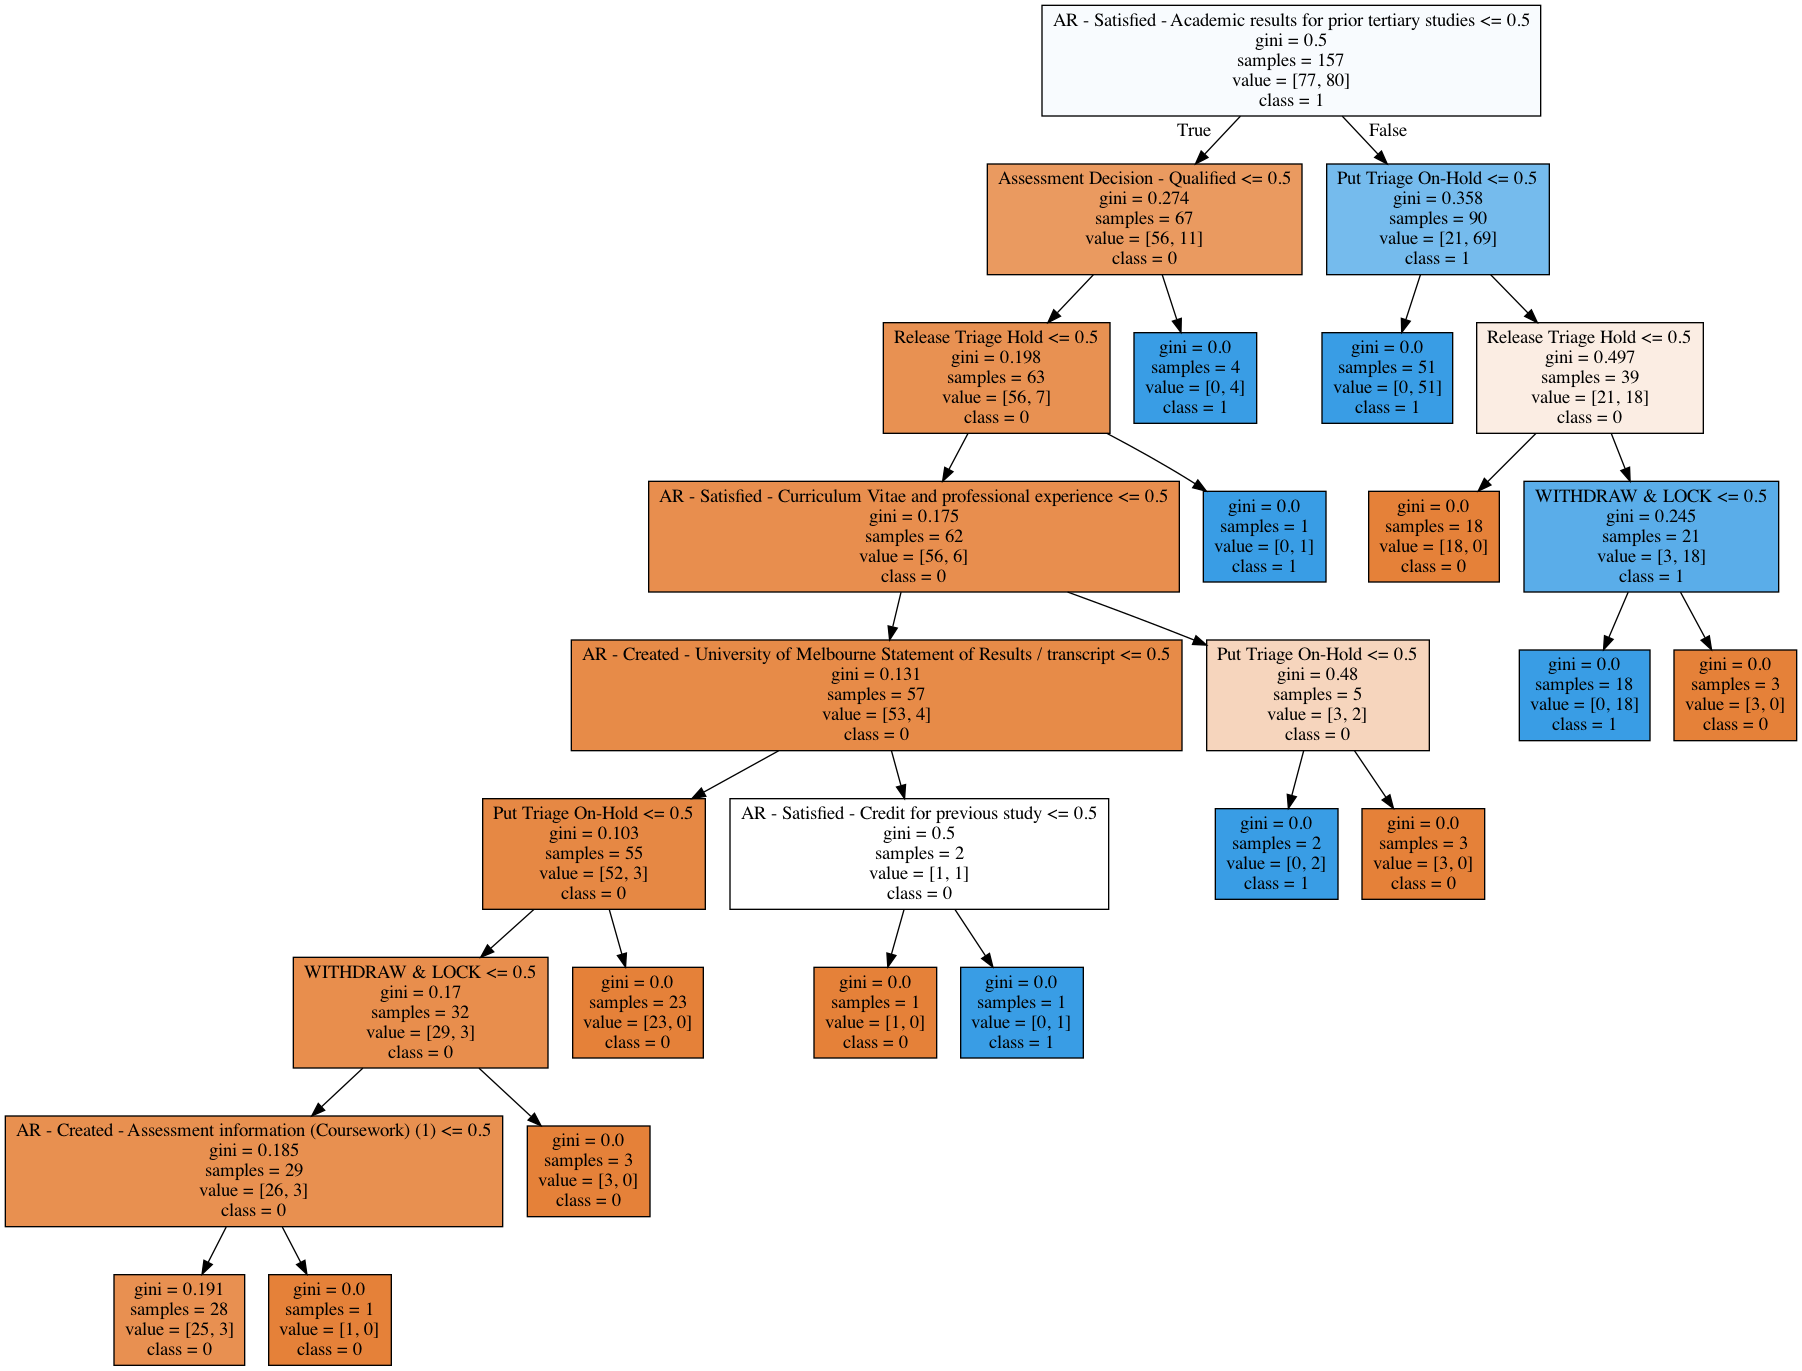

In [26]:
# Show graph
Image(graph.create_png())

In [27]:
# Create PNG
graph.write_png("engineering_AF_segment3_workflowS1_decisiontree_downsampled.png")

True